# Proyecto Final Machine Learning #
# Universidad de Guanjuato #
## Darío Ramírez Andrade ##
## 06/2025 ##


### Modelos secuenciales, Redes Neuronales Recurrrentes (RNN) y Long Short Term Memory (LSTM): ###

¿La historia de los datos cuenta? Absolutamente sí, podemos extraer bastante información y relevancia del orden secuencial de los datos.
Algunos ejemplos sencillos es el procesamiento de lenguaje natural y audios de voz.

### La lógica: ##

Un ejemplo del que podemos partir es: 
- "El caballo blanco corre por la pradera libre y rápido".
"Libre" nos da mucho contexto y significados que podemos interpretar.
- "Las nuevas elecciones fueron necesarias, aunque pensé que iban a ser un desastre"

¿Cómo hacemos para analizar el sentimiento del enunciado?

Podemos tener una red neuronal para cada palabra, este conjunto de redes se le denomina time-step.

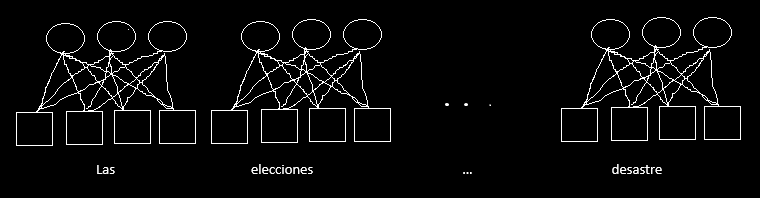


Si de alguna manera estas redes ya funcionase y tienen toda su implementación, la palabra desastre sin todo el contexto la clasificaría como "mala", sentimiento negativo; es ahí donde entra las Redes Neuronales Recurrentes.
¿Que podemos hacer para no tener esta pérdida de contexto?
Hacemos "un vector con contexto" que incluye toda la información previa, es por eso que recuerda información del pasado.
Agregamos una capa densa el cual tendrá toda la información histórica.
La suma de esta capa histórica y de la capa secuencial junto con su función de activación es una RNN cell.

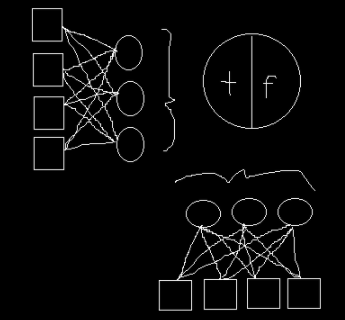

En cada time-step vamos a tener una estructura similar a esta.

De manera descriptiva este sería el funcionamiento de una RNN donde en su estructura tiene varias celdas RNN y al final, dependiendo del problema puede hacer una regresión o una clasificación.


### Puntos clave: ###

- Los pesos iniciales de la capa densa oculta es ceros.
- Normalmente se usa tanh como funcón de activación en las RNN cell.
- Se actualizan los pesos como normalmente se suele hacer para capas densas y/o CNN, usando un tipo de retro propagación( Backpropagation throug time).

### El problema y solución: ###

- Vanishing Gradient: si las derivadas en cada paso son pequeñas (por ejemplo menor que 1), al multiplicarlas muchas veces (una por cada paso en el tiempo), el gradiente se hace cada vez más pequeño, hasta que es casi cero. Eso impide que la red aprenda dependencias lejanas.

- Entra LSTM (variante de las RNN), usa una conexión directa para el estado de memoria (el cell-state), que permite que el gradiente fluya sin apagarse.

## Long Short Term Memory (LSTM): ##

Agrego un "camino", un camino fácil para el backpropagation donde además tenemos el control de Gates (que tanto conservamos o dejamos pasar del estado pasado de la celda). Como dato, el paper original de LSTM se presentó en 1997, pasaron 20 años para ser relevante, definitivamente adelantado a su época.

Para entender las LSTM, podemos decir que es una estructura con varias sub-celdas RNN dentro de un sola  celda LSTM.




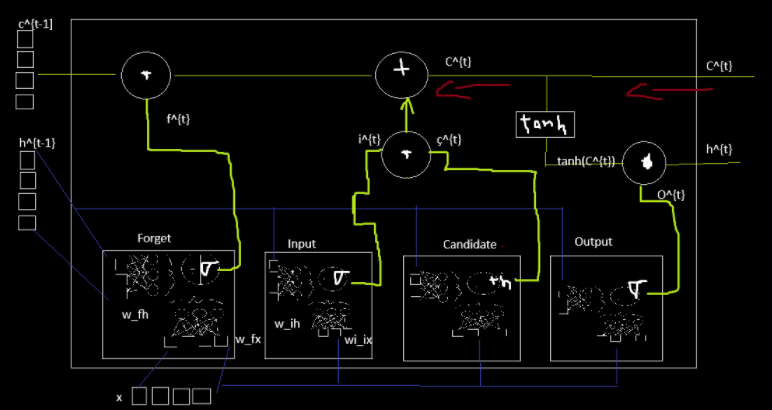

## Puntos clave y ecuaciónes: ##



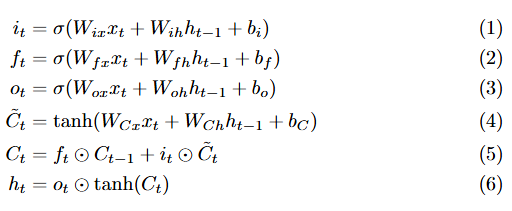

1. Input Gate: Un valor cercano a 1 significa "dejar pasar" o "agregar mucha" de la nueva información potencial. Un valor cercano a 0 significa "casi no agregar" nada de la nueva información. Este valor i_t es una señal de cuánta atención se le debe prestar a la nueva información entrante.

2. Forget Gate: Un valor cercano a 1 para un elemento en particular significa "recordar" o "mantener" esa parte del estado de memoria anterior. Un valor cercano a 0 significa "olvidar" o "descartar" esa parte. Es la señal que controla el flujo de información hacia adelante desde el estado de celda anterior.

3. Output Gate: Un valor cercano a 1 para un elemento significa que esa parte del estado de celda actual es muy importante para la salida. Un valor cercano a 0 significa que no es tan relevante. Este valor O_t es una señal que controla cuánta información del estado de la celda se expone para convertirse en el nuevo estado oculto.

4. Los valores de Ç representan la información nueva y fresca que la red ha decidido que es potencialmente importante para el estado de memoria, ya sea para agregarla (valores positivos) o para restarla (valores negativos).

5. Cell State: La LSTM decide explícitamente que olvidar de la memoria pasada f_t * C_t y que nueva información añadir i_t * Ç_t para formar la memoria actual. El producto Hadamard (punto) es clave aquí, ya que actúa como un "filtro" elemento a elemento.

6. La compuerta de salida O_t decide qué partes del estado de memoria filtrado (tanh(C_t)) son relevantes para ser expuestas como la salida de esta celda en este paso de tiempo. Esto permite que la LSTM mantenga información compleja en su estado de celda C_t sin tener que exponerla toda en su salida inmediata h_t, lo que la hace muy potente para modelar secuencias.

El siguiente artículo profundiza un poco más sobre las ecuaciones y nos quedamos con la siguiente imagen proporcionada. https://www.mdpi.com/2072-4292/10/3/452

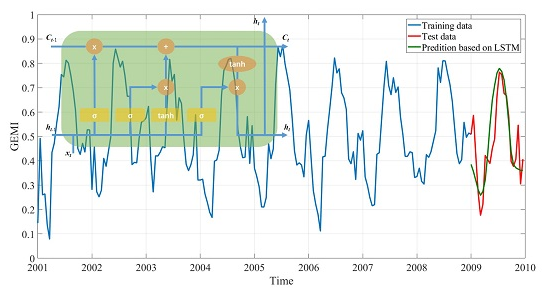

### Ventanas y tipos de series temporales: ###

Dependiendo de nuestro problema y serie temporal, es que podemos hacer diferentes tipos de "ventanas", como ya visto, son los time-step.

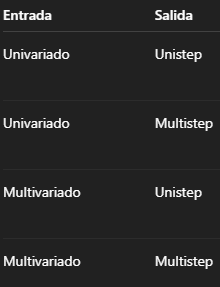


## Implementación LSTM ##

El objetivo será predecir los valores Close de la Cryptomoneda Bitcoin. Donde usando diferentes atributos (Multivariado) haremos una predicción de una sola clase y un instante de tiempo, en este caso "Close" en dólares.

1. Cargar el dataset obtenido en Keggle https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv


In [119]:
import pandas as pd # manejo de dataset
import matplotlib.pyplot as plt # para graficar
import seaborn as sns # para graficar

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True) #permitimos acceso

#leemos el csv
df = pd.read_csv("coin_Bitcoin.csv")

df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


## 2. Pre-procesamiento ##

In [120]:
# eliminamos columnas no necesarias
df = df.drop(columns=["SNo", "Name", "Symbol"])

# convierto date a formato válido de pd "datetime" sino no funciona las fechas(IMPORTANTE)
df["Date"] = pd.to_datetime(df["Date"])

df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


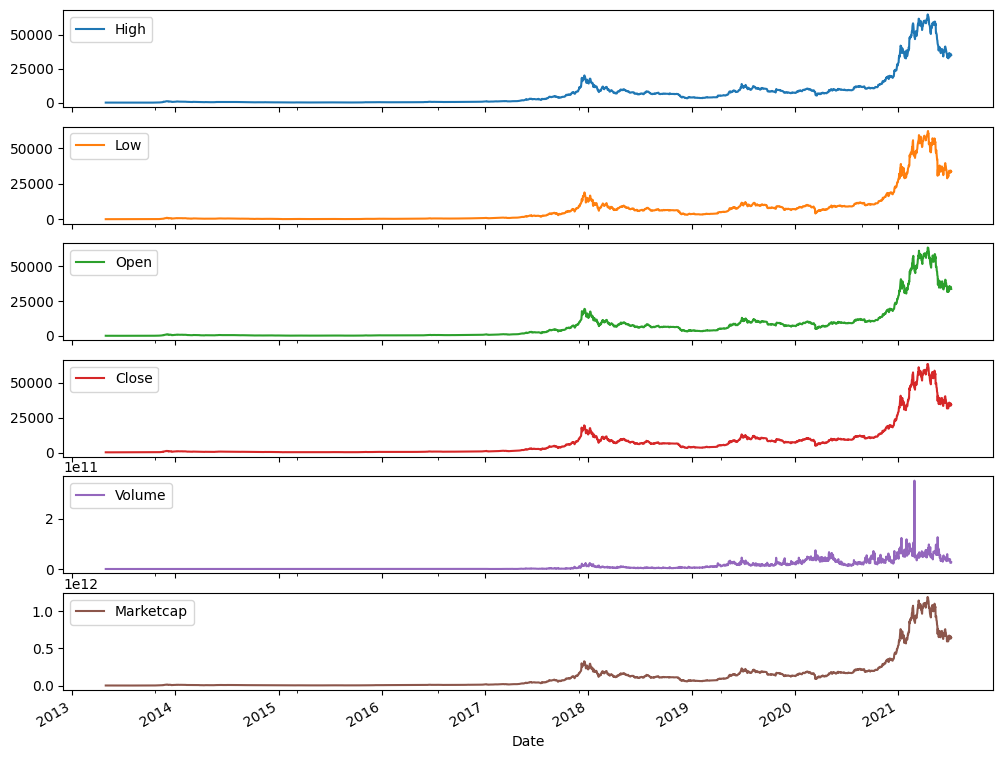

In [121]:
date_time = df.pop("Date") # convierto date_time a los índices

# evolución caracteristicas a lo largo del tiempo
plot_cols = ["High", "Low", "Open", "Close", "Volume", "Marketcap"]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(12, 10))
plt.show()

  Hacemos una partición 70/20/10 para entrenamiento, validacón y prueba.

  **IMPORTANTE:** Respetar las particiones cronológicamente.

In [122]:
#genero particiones
n = len(df) #cantidad datos en df
train_data = df[0:int(n*0.7)] #70
val_data = df[int(n*0.7):int(n*0.9)] #20
test_data = df[int(n*0.9):] #10


Implemento sklearn para usar un normalizador, ya que como los modelos ML se requiere normalizar los datos para evitar sesgos y sensibilidades.

En este punto, varios programadores y autores usan StandardScaler o MinMaxScaler; por medio de prueba y error con MinMax obtengo un val_loss menor (si tuve en consideracón la funcion de activación tanh).

In [123]:
from sklearn.preprocessing import MinMaxScaler #StandardScaler

# creo el scaler usando solo los datos de entrenamiento
scaler = MinMaxScaler(feature_range=(-1, 1)) #StandardScaler()

train_scaled = scaler.fit_transform(train_data)
# scaler para validacion y prueba
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

# convertimos a DataFrames
train_scaled = pd.DataFrame(train_scaled, columns=train_data.columns)
val_scaled = pd.DataFrame(val_scaled, columns=val_data.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_data.columns)


print(f"{df.shape[0]}\n") #No. datos y columna siempre 6 [1]
print(f"{train_data.shape[0]}") #No. datos entrenamiento y columna siempre 6 [1]
print(f"{val_data.shape[0]}") #No. datos validacion y columna siempre 6 [1]
print(f"{test_data.shape[0]}") #No. datos test y columna siempre 6 [1]


2991

2093
598
300


## Ventana temporal : 

In [124]:
#VENTANA TEMPORAL
#past = 30     # Usamos 30 días anteriores (ultimos 30 dias para predecir)
#past = 15     # Usamos 15 días anteriores (ultimos 15 dias para predecir)
past = 7     # Usamos 7 días anteriores (ultimos 7 dias para predecir)
future = 1    # Queremos predecir 1 día en el futuro (target)

#HIPERPARAMETROS
learning_rate = 0.001 # para el optimizador
batch_size = 256 # cuantas muestras se usan en cada paso del entrenamiento
                  # normalmente potencias de 2
epochs = 20       # epocas que recorre el dataset
step = 1          # sampling rate: para construir las secuencias sin saltos

import keras

x_train = train_scaled.values  # convertimos a Array con valores escalados
y_train = train_scaled.iloc[past + future :][["Close"]]
# el target será Close, past + future son los indices para alinear la predicción
# ej. como aquí past=30 y future=1, para la secuencia usa datos [0:29]
# como input, la etiqueta será el valor en la posición 31

#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length= past,
    sequence_stride= 1, # se desliza con superopocisión
    sampling_rate= step, # se salta (dependiendo) los datos de la ventana
    batch_size= batch_size,
)



In [125]:
# defino indice máximo, que no pase del límite del conjunto de validación
x_end = len(val_scaled) - past - future

# extraigo las filas desde el inicio hasta x_end de val_scaled (ya escalado)
x_val = val_scaled.iloc[:x_end].values

# el primer índice de y_val es past + future para alinear con las secuencias de entrada.
y_val = val_scaled.iloc[past + future :][["Close"]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=past,
    sequence_stride=1,
    sampling_rate=step,
    batch_size=batch_size,
)


# verificación
# dataset_val tiene bach size y las columnas
for batch in dataset_val.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)
print(f"{x_end}")
print(f"{dataset_val}")

Input shape: (256, 7, 6)
Target shape: (256, 1)
590
<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>


## Constructor: ##

¿Dónde quedan todas las ecuaciónes antes vistas? Todas las ecuaciones de la LSTM, como la input gate, forget gate, output gate etc., están embebidas dentro de la capa keras.layers.LSTM; Keras las implementa internamente cuando definimos esa capa. Nosotros solo preparamos la entrada como una secuencia temporal (en mi caso la variable past), y luego esa capa se encarga de aplicar todos los pasos recurrentes. Finalmente, usamos una capa densa para proyectar el estado oculto final a una predicción del dia futuro.

A la salida final, me da el estado oculto final h_t, con dimensión (batch_size, 32)

Ese 32 es cada célula LSTM con 32 unidades. Y cada unidad LSTM tiene sus propias puertas.



In [126]:
# capa de entrada, 30 muestras de 6 features(columnas)
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# añado una capa LSTM con 32 neuronas
# devuelve el último estado oculto por cada muestra de dimensión: (batch_size, 32)
# Keras retorna solo el output del último timestep
lstm_out = keras.layers.LSTM(32)(inputs)
# última capa densa full conected con una neurona de salida para la regresión
outputs = keras.layers.Dense(1)(lstm_out)

# creo el modelo
model = keras.Model(inputs=inputs, outputs=outputs)
# el optimizador con adam y la tasa de aprendizaje
# función de pérdida mse
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
# resumen arquitectura
model.summary()

print(f"{inputs.shape[1]}")
print(f"{inputs.shape[2]}")

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 7, 6)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,025 (19.63 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

7
6


## Entrenamiento: ##

In [127]:
# guardar pesos en archivo, detener entrenamiento y guardar el mejor estado
"""
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)
"""
# inicio entrenamiento con validacion para medirlo
# history para guardar el historial de pérdidas y métricas por época
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    #callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - loss: 1.1623 - val_loss: 0.0293
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.3121 - val_loss: 0.0102
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0230 - val_loss: 0.0174
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0219 - val_loss: 0.0151
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0066 - val_loss: 0.0105
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.0103 - val_loss: 0.0093
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0060 - val_loss: 0.0095
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0036 - val_loss: 0.0091
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0033 - val_loss: 0.0084
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0036 - val_loss: 0.0079
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0035 - val_loss: 

## Evaluaciones: ##


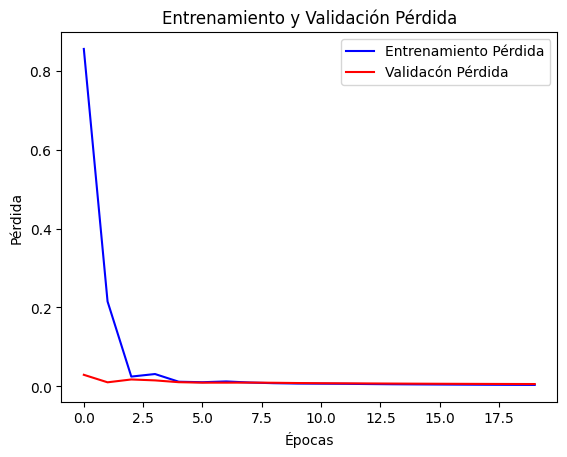

In [128]:
#https://www.ibm.com/docs/es/masv-and-l/maximo-vi/cd?topic=models-graph-training
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Entrenamiento Pérdida")
    plt.plot(epochs, val_loss, "r", label="Validacón Pérdida")
    plt.title(title)
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.legend()
    plt.show()


visualize_loss(history, "Entrenamiento y Validación Pérdida")

El objetivo es que el modelo converja al final del entrenamiento con un nivel de pérdida bajo.

### Des-escalamiento: ###

In [129]:
import numpy as np
import matplotlib.pyplot as plt

#invierto el escalado de valores escalados que predice
def invert_scaling(scaled_close):
    #dummy para lleno de ceros con el mismo número de columnas que
    #tenía el dataset original (train_scaled.shape[1])
    dummy = np.zeros((len(scaled_close), train_scaled.shape[1]))
    #coloco los valores predichos en la columna close
    dummy[:, df.columns.get_loc("Close")] = scaled_close[:, 0]
    #hago transformación inversa y devuelve Close ya descalada
    return scaler.inverse_transform(dummy)[:, df.columns.get_loc("Close")]

# Preparar dataset_test igual que dataset_val
x_test_full = test_scaled.values #convierto a array
#defino el punto hasta donde tomar datos para crear las secuencias
x_end_test = len(test_scaled) - past - future
#extraigo el rango válido
x_test = test_scaled.iloc[:x_end_test].values
#preparo las salidas alineando con las secuencias generadas
#(sáltandose los primeros past + future para que coincidan con x)
y_test = test_scaled.iloc[past + future :][["Close"]]

#creo ventana similar a la pasada pero para test
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=past,
    sampling_rate=step,
    batch_size=batch_size,
)

#hago las predicciones del modelo sobre el dataset de validación
pred_val = model.predict(dataset_val)
#son los valores no escalados aún extraídos del dataset.
real_val = np.concatenate([y for x, y in dataset_val], axis=0)

#lo mismo pero con test
pred_test = model.predict(dataset_test)
real_test = np.concatenate([y for x, y in dataset_test], axis=0)

#invierto el escalado
pred_val_inv = invert_scaling(pred_val)
real_val_inv = invert_scaling(real_val)
pred_test_inv = invert_scaling(pred_test)
real_test_inv = invert_scaling(real_test)

#extraigo los índices de fechas correspondientes para poder graficar validación y test
#alineo para que tengan el mismo largo que los vectores real_val_inv y real_test_inv
val_indices = val_data.index[past + future : past + future + len(real_val_inv)]
test_indices = test_data.index[past + future : past + future + len(real_test_inv)]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step 


### Gráficas, medidas y predicciones: ###

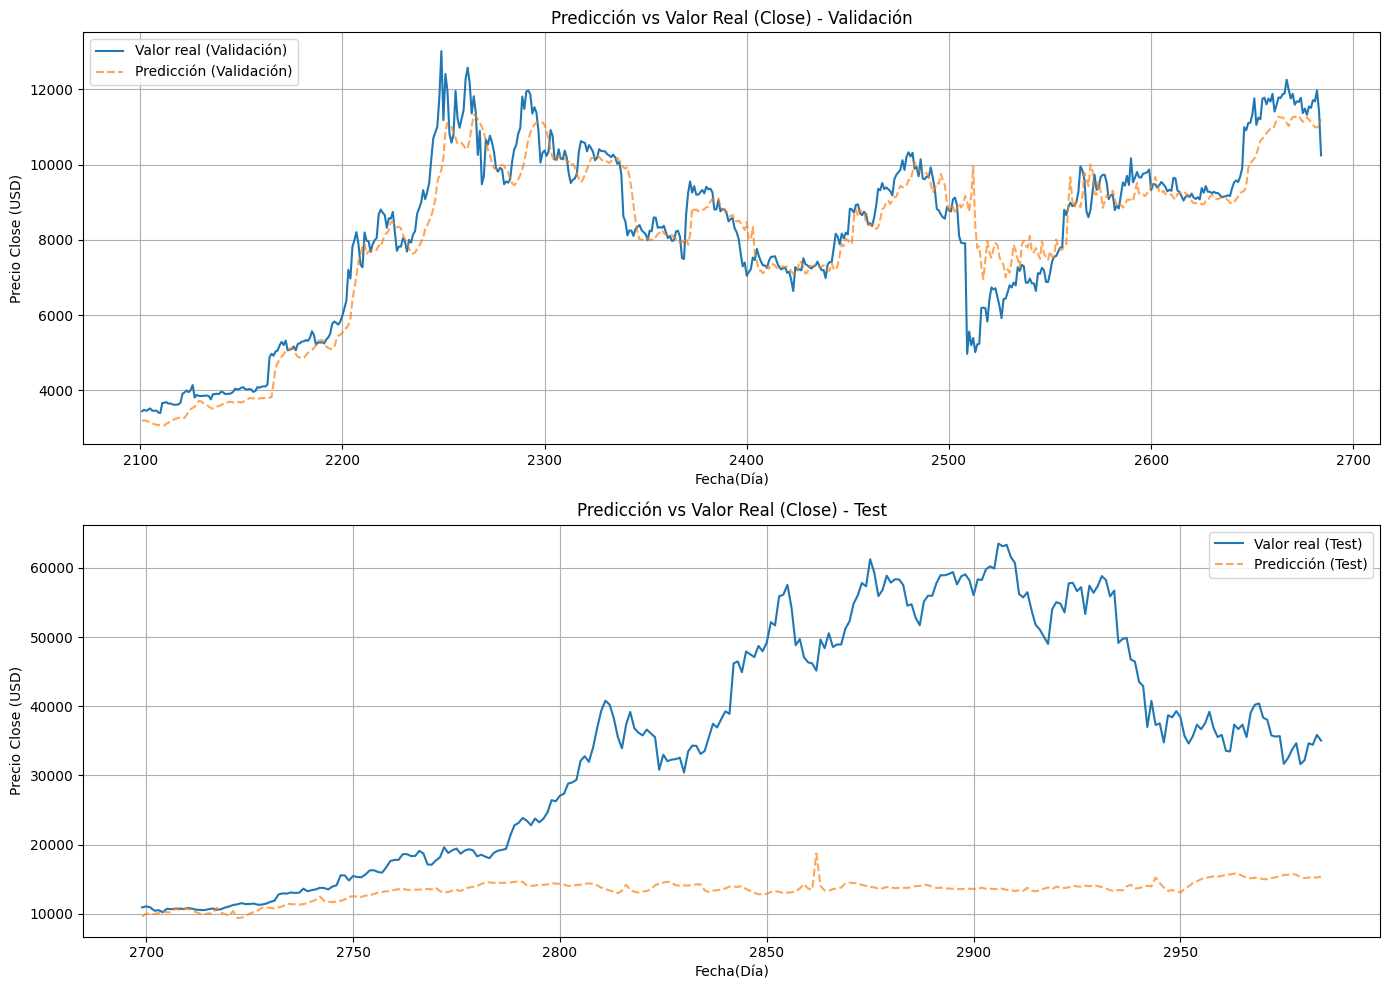

In [130]:
# gráfica de resultados val y test
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=False)

# gráfica 1 validación (predicción vs real)
ax1.plot(val_indices, real_val_inv, label="Valor real (Validación)")
ax1.plot(val_indices, pred_val_inv, label="Predicción (Validación)", alpha=0.7, linestyle='--')
ax1.set_title("Predicción vs Valor Real (Close) - Validación")
ax1.set_xlabel("Fecha(Día)")
ax1.set_ylabel("Precio Close (USD)")
ax1.legend()
ax1.grid(True)

# gráfica 2 test (predicción vs real)
ax2.plot(test_indices, real_test_inv, label="Valor real (Test)")
ax2.plot(test_indices, pred_test_inv, label="Predicción (Test)", alpha=0.7, linestyle='--')
ax2.set_title("Predicción vs Valor Real (Close) - Test")
ax2.set_xlabel("Fecha(Día)")
ax2.set_ylabel("Precio Close (USD)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

La validación fue buena, pero el test falla. Pueden ocurrir varias cosas:

- El modelo aprendió muy bien el set de entrenamiento/validación, pero no generaliza bien al test. Esto lo podemos mantener ya que ajustando hiperparametros no cambia demasiado, de hecho todas las actualizaciones dan bien la validación pero no el testeo.
Igual podemos dar alguna explicación pero será mas a detalle adelante.

- Error en el escalado o desescalado. Esto tambien lo podemos descartar ya que viendo otras fuentes parecidas, donde analizan igual "acciones" mediante LSTM vemos gráficas de validación y valor real con una naturaleza similar.

- Prediciones lejanas (future). En este caso usamos el mínimo (1), justo para evitar complicaciones en cuestión de predecir más instantes de tiempo.

Predicción de acciones en la bolsa con PYTHON (tutorial redes LSTM) por Codificando Bits: https://www.youtube.com/watch?v=3kXj6VgxbP8

Min. 4:00

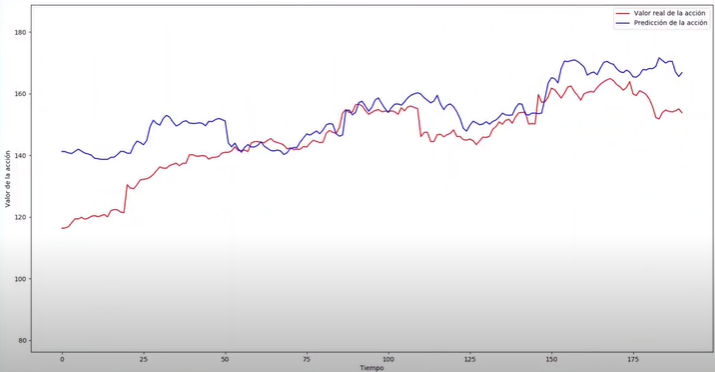

### Mean Absolute Error (MAE) ###

Usamos métricas cuantitativas, una común para regresión es MAE que mide el error promedio en valor absoluto.

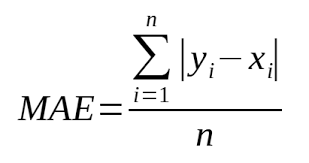

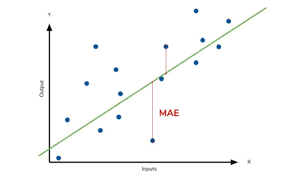

In [131]:
from sklearn.metrics import mean_absolute_error

mae_val = mean_absolute_error(real_val_inv, pred_val_inv)
mae_test = mean_absolute_error(real_test_inv, pred_test_inv)

print(f"MAE Validación: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

MAE Validación: 511.98
MAE Test: 21553.11


En mejor de los casos tuvimos un MAE de Validación de 405.5 y MAE en Test de 19401.89

Esto indica que entre el error de validación y de test dice que el modelo aprendió bien en entrenamiento/validación, pero cuando ve datos nuevos (test) falla mucho.

Esto puede deberse a que los precios en testeo son mucho más altos que en validación (por eso el MAE es tan alto en test). Por lo que asumimos que tal vez hubo una subida fuerte en el mercado y el modelo nunca vio o "vivio" algo parecido.
Que de hecho fue cuando fue el "BOOM" de la cripto.

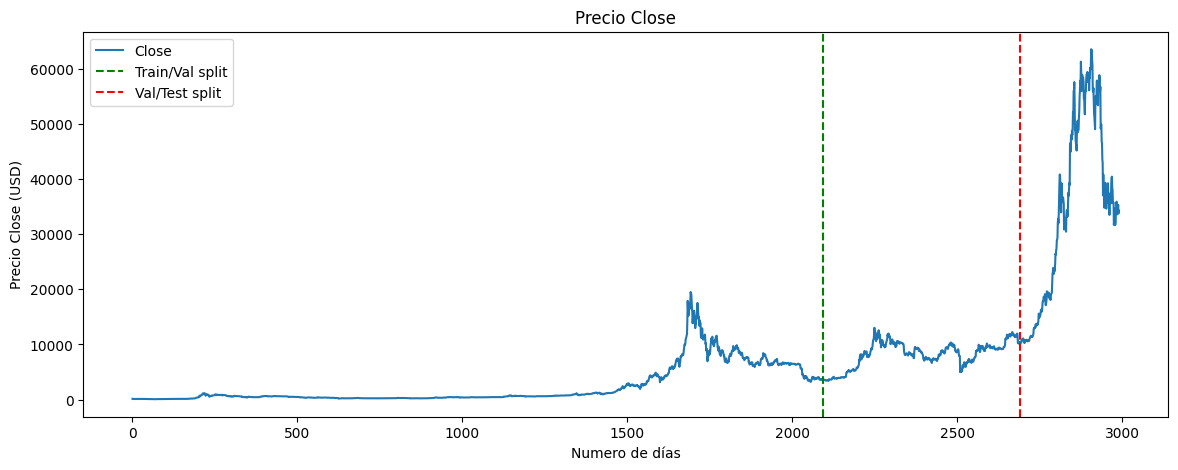

In [132]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Close')
plt.axvline(x=len(train_data), color='green', linestyle='--', label='Train/Val split')
plt.axvline(x=len(train_data) + len(val_data), color='red', linestyle='--', label='Val/Test split')
plt.legend()
plt.gca().set(xlabel="Numero de días", ylabel="Precio Close (USD)", title="Precio Close")
plt.title('Precio Close')
plt.show()


### Para ver un poco mejor: El Error Porcentual Absoluto Medio (MAPE) ##

Es una métrica para evaluar la precisión de los modelos de regresión. Se calcula como el promedio de los porcentajes absolutos de diferencia entre los valores previstos y los valores reales (que ya lo hicimos arriba), expresados como un porcentaje. El MAPE es útil para comprender la desviación promedio de las predicciones en relación con los valores reales.

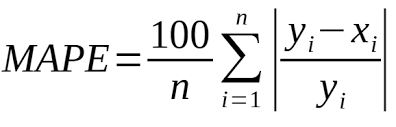

In [133]:
from sklearn.metrics import mean_absolute_percentage_error

mape_val = mean_absolute_percentage_error(real_val_inv, pred_val_inv) * 100
mape_test = mean_absolute_percentage_error(real_test_inv, pred_test_inv) * 100

print(f"MAPE Validación: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")


MAPE Validación: 6.74%
MAPE Test: 50.10%


Como el anterior, el mejor MAPE fueron de 7.81% para validación y para MAPE Test de 51.80%

## Conclusiones: ##

La LSTM aprendió bien las secuencias de entrenamiento/validación.

Los errores en test es casi del 50%, similar a lo que se nos comentó en su día en la clase, ya que los modelos donde se predicen cripto, acciones, el mercado bursátil en general es algo muy complejo; ya que tiene tantos factores y métricas que se pueden agregar, los cuales no tenemos o no se encuentra alguna relevancia o significado, como por ejemplo lo que diga algún presidente, guerras, etc. cosas que claramente no estan presentes en el modelo y su implementacion seria muy difícil por no decir imposible.

Sin embargo el propósito en general del modelo fue implementado correctamente, dando a explicar las métricas, sus conceptos clave como las ventanas, time-steps, gates dentro de una LSTM.

En consideración, mi principal idea del proyecto era incluir un API el cual día con día se actualice, carguen y entrene el modelo ya que así tendrá siempre en constante actualización la capa histórica, claro, seguira siendo un modelo falible ante las cuestiones ya mencionadas (política), pero así evitariamos el error de que los datos de entrada son cosas que no ha "vivido" ya que al final esa es la ventaja de las LSTM, extraer información del pasado.

Referencias:

- Zhao, R., Yan, R., Chen, Z., Mao, K., Wang, P., & Gao, R. X. (2018). Deep learning and its applications to machine health monitoring. Remote Sensing, 10(3), 452. https://doi.org/10.3390/rs10030452

- Pepe Cantoral. (2021, junio 3). Qué es una LSTM | Redes neuronales recurrentes [Video]. YouTube. https://www.youtube.com/watch?v=f6PaCo-NfJA

- Pepe Cantoral. (2021, junio 3). Cómo funcionan las LSTM paso a paso | Parte práctica [Video]. YouTube. https://www.youtube.com/watch?v=x6E44DDWg5Q

- Codificando Bits. (2017, diciembre 1). Recurrent Neural Networks (RNN) and Long Short Term Memory (LSTM) [Video]. YouTube. https://www.youtube.com/watch?v=3kXj6VgxbP8

- Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural Computation, 9(8), 1735–1780.

- TensorFlow. (n.d.). tf.keras.preprocessing.timeseries_dataset_from_array. TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

- Keras. (n.d.). Time series forecasting using weather data. Keras. https://keras.io/examples/timeseries/timeseries_weather_forecasting/

- IBM. (n.d.). Graph training models. IBM Documentation. https://www.ibm.com/docs/es/masv-and-l/maximo-vi/cd?topic=models-graph-training

- OpenAI. (2025). ChatGPT (June 2025 version) [Large language model]. https://chat.openai.com/ Utilizado para generar imágenes, ecuaciones y consultas.

- Kumar, S. (2018). Cryptocurrency Historical Market Price Data [Dataset]. Kaggle. https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
